# Paper AIOM

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt


import matplotlib as mpl
import statsmodels.api as sm
%matplotlib inline 
import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


rd.seed(123)

## About the Problem

A company based in Curitiba (Brazil) is developing a machine that analyzes the quality of soybeans using computer vision. Currently the classification is developed by human workers. Thus, we seek to analyze the logistical impact (queue time and processing time) based on the inclusion of this machine. The process of analyzing the quality of grains is represented in the figure below.

<p align="center">
  <img src="images/MFV.png" />
</p>

For the analysis, a simulation model in AnyLogic was developed.
<p align="center">
  <img src="images/simulation.png" />
</p>

As input, historical data from performing analyzes were included. As the aim is to analyze the logistical impact, a parameter variation approach was adopted to understand the best formation for the problem. The chosen parameters are:

- **Workers**: quantity $w$ of workers available to perform the task (1, 3 or 5);
- **Machines**: quantity $m$ of machines available to perform the task (1,3 or 5);
- **Worker wait**: a boolean variable. If $m < w$, the workers must choose whether to wait for the machine to finish analyzing grains before using it or to analyze in parallel (not using the machine);
- **Human Classification Time**: can be 195 or 615 seconds, depending on the applied method;
- **Machine Classification Time**: it is 120 seconds, but the new improvement achieved 60 seconds. Both cases were simulated.

All the simulated scenarios are presented below.

In [2]:
scenarios = pd.read_excel("Data/scenarios.xlsx")
scenarios

,Scenarios,Workers,Machines,Worker Wait,Human Classification Time,Machine Classification Time
0,Scenario 1,1,0,-,195,-
1,Scenario 2,1,0,-,615,-
2,Scenario 3,3,0,-,195,-
3,Scenario 4,3,0,-,615,-
4,Scenario 5,5,0,-,195,-
5,Scenario 6,5,0,-,615,-
6,Scenario 7,1,1,True,195,60
7,Scenario 8,1,1,True,615,60
8,Scenario 9,1,1,True,195,120
9,Scenario 10,1,1,True,615,120


### Objective

Using the simulated data, apply machine learning methods to predict the estimated queue, processing and total time for each of the 54 scenarios.


## Data Preprocessing

In [3]:
# Importing Data
data = pd.read_csv("Data/dataset.csv")
data = data.loc[:, data.columns!='Unnamed: 0']
print(f"Nº of observations: {len(data)}")
data.head()

Nº of observations: 4678380


,workers,workersWaiting,machineProcTime,qntMachines,cutBean,month,week,day,dayofweek,queueTime,procTime,totalTime
0,1.0,0,1.0,1.0,0.0,1,1,3,2,0.0,6.538521,6.538521
1,1.0,0,1.0,1.0,0.0,1,1,3,2,0.0,6.281081,6.281081
2,1.0,0,1.0,1.0,0.0,1,1,3,2,0.0,6.499349,6.499349
3,1.0,0,1.0,1.0,0.0,1,1,3,2,0.0,4.773382,4.773382
4,1.0,0,1.0,1.0,0.0,1,1,3,2,0.0,6.409866,6.409866


<AxesSubplot:>

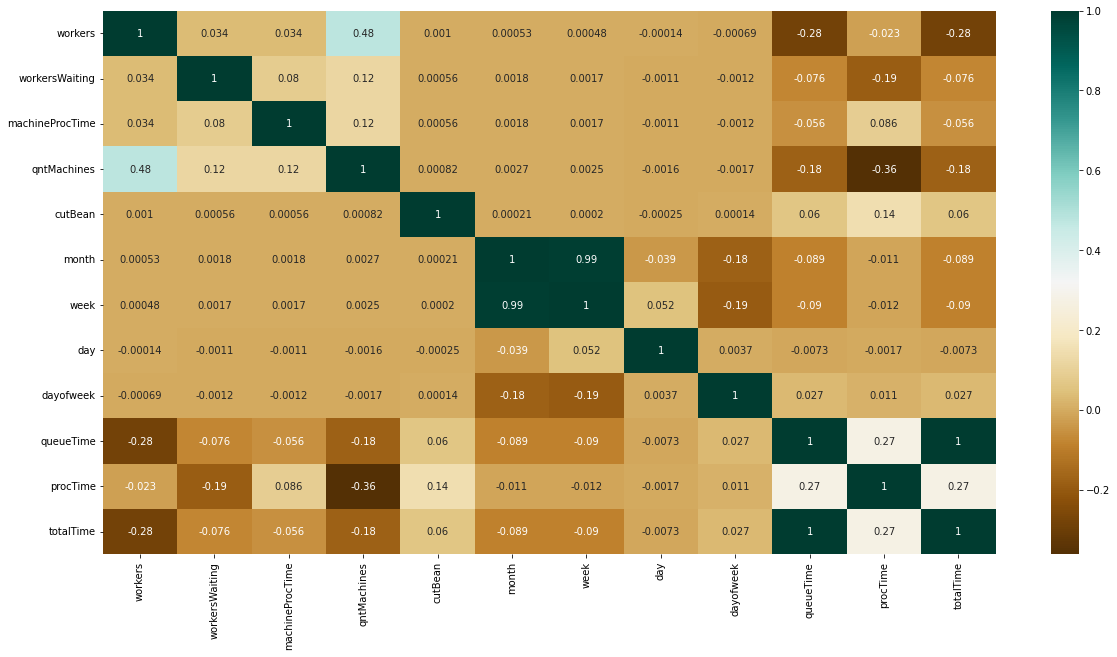

In [4]:
# A Heat Map is a plot that can be used to find dependent variables. 
fig1=plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

### Distributions of all features 

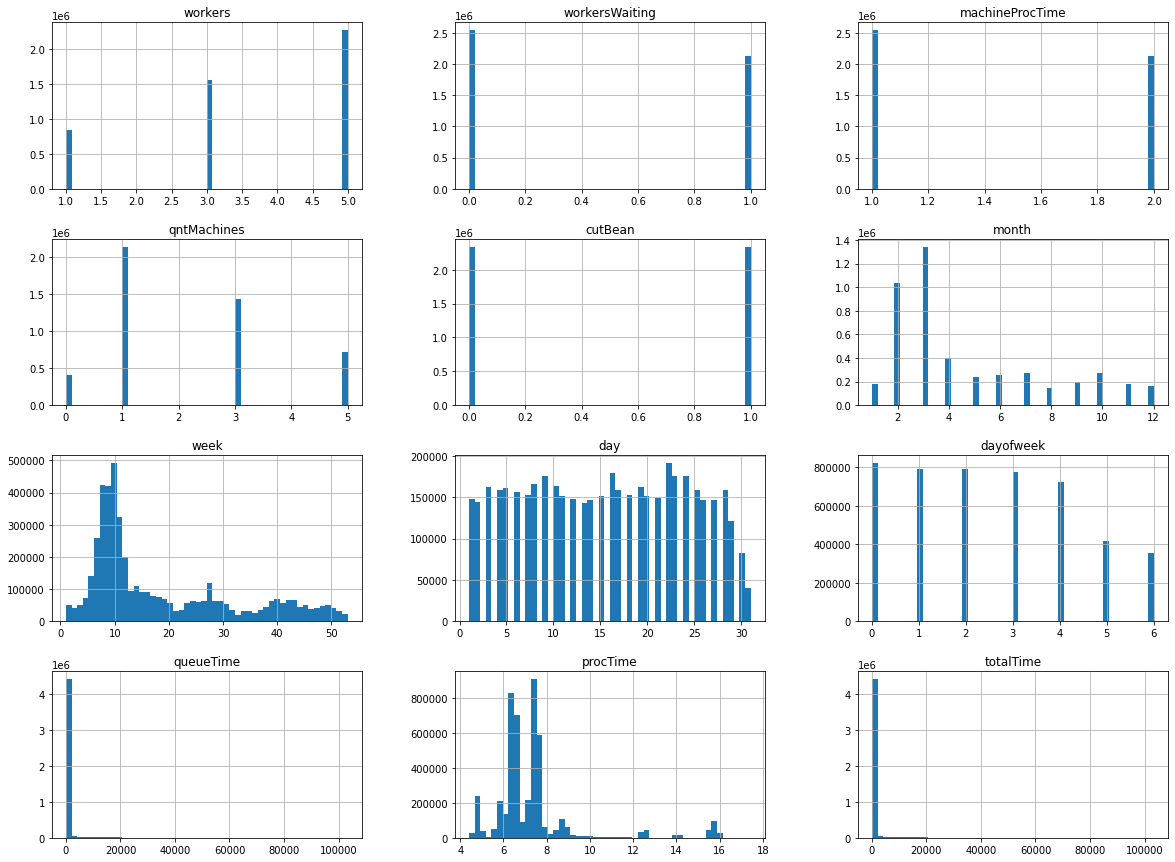

In [5]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

### Predicting Queue Time

In [6]:
# Splitting dataset into the training set and test set
features = data.iloc[:, :-3].values
queue = data.iloc[:, -3].values

X_train_queue, X_test_queue, y_train_queue, y_test_queue = train_test_split(features, queue, test_size = 0.2, random_state = 0)

# Feature Scaling
sc1 = StandardScaler()
X_train_queue = sc1.fit_transform(X_train_queue)
X_test_queue = sc1.transform(X_test_queue)

In [7]:
vetor = [LinearRegression(),
        RandomForestRegressor(random_state=42,n_estimators=40),
        ensemble.GradientBoostingRegressor(),
        SVR(kernel = 'rbf')]

for model in vetor:
    # Fit model
    model.fit(X_train_queue, y_train_queue)
    # Predict values of the test dataset
    y_pred = model.predict(X_test_queue)
    # Calculate root mean squared error
    rmse = np.sqrt(mean_squared_error(y_pred, y_test_queue))
    print('Model RMSE: ', '{:,}'.format(round(rmse, 2)))
    

Model RMSE:  5,232.08
Model RMSE:  144.41
Model RMSE:  3,099.26


### Predicting Processing Time

In [ ]:
# Splitting dataset into the training set and test set
features = data.iloc[:, :-1].values
process = data.iloc[:, -2].values

X_train_process, X_test_process, y_train_process, y_test_process = train_test_split(features, process, test_size = 0.2, random_state = 0)

# Feature Scaling
sc2 = StandardScaler()
X_train_process = sc2.fit_transform(X_train_process)
X_test_process = sc2.transform(X_test_process)
models = utils.createModels(X_train_process, y_train_process, X_test_process,y_test_process)
utils.printModels(models)

### Predicting Total Time

In [ ]:
# Splitting dataset into the training set and test set
features = data.iloc[:, :-1].values
total = data.iloc[:, -1].values

X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(features, total, test_size = 0.2, random_state = 0)

# Feature Scaling
sc3 = StandardScaler()
X_train_total = sc3.fit_transform(X_train_total)
X_test_total = sc3.transform(X_test_total)